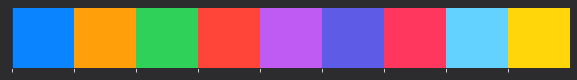

In [6]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from cycler import cycler
import plotly.graph_objects as go
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorboard as tb
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.data import Dataset

%matplotlib inline

raw_dark_palette = [
    (10, 132, 255), # Blue
    (255, 159, 10), # Orange
    (48, 209, 88),  # Green
    (255, 69, 58),  # Red
    (191, 90, 242), # Purple
    (94, 92, 230),  # Indigo
    (255, 55, 95),  # Pink
    (100, 210, 255),# Teal
    (255, 214, 10)  # Yellow
]
raw_darks=[
    (44, 44, 46)
]
raw_lights=[
    (229, 229, 234)
]
miscellaneous={
    'blue':'#0f71d4',
    'green':'#14b827',
    'red':'#cf0c0c'
}

dark_palette=np.array(raw_dark_palette)/255
darks=np.array(raw_darks)/255
lights=np.array(raw_lights)/255

#rcparams
dark_color=darks[-1]
light_color=lights[-1]

mpl.rcParams['axes.prop_cycle']=cycler('color',dark_palette)
mpl.rcParams['figure.facecolor']=dark_color
mpl.rcParams['figure.edgecolor']=dark_color
mpl.rcParams['axes.facecolor']=dark_color
mpl.rcParams['text.color']=light_color
mpl.rcParams['axes.labelcolor']=light_color
mpl.rcParams['axes.edgecolor']=dark_color
mpl.rcParams['xtick.color']=light_color
mpl.rcParams['ytick.color']=light_color
mpl.rcParams['figure.dpi']=80
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

sns.palplot(dark_palette)

In [7]:
train=pd.read_csv('data/train.csv',index_col=[0])
test=pd.read_csv('data/test.csv',index_col=[0])
train['target']=train['target'].str.slice(start=6).astype(int)-1
train.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,3,0,0,21,0,0,0,0,0,0,1
1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,3,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0,0,0,0,1,0,5,2,1,1,0,1,0,2,0,0,0,0,19,2,0,1,7,3,0,0,0,1,0,0,0,0,13,2,0,0
3,0,0,0,0,0,0,0,3,0,0,0,0,0,1,7,11,1,0,3,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,3
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,9,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1


In [8]:
train,val=train_test_split(train,test_size=0.2)

In [10]:
train_target=train.pop('target')
val_target=val.pop('target')
train=Dataset.from_tensor_slices((train.values,train_target.values))
val=Dataset.from_tensor_slices((val.values,val_target.values))

In [12]:
BATCH_SIZE=32
BUFFER_SIZE=10000

In [13]:
train=train.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(1)
val=val.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(1)

TypeError: 'PrefetchDataset' object is not subscriptable